In [4]:
# Import
import sys
import sklearn
import matplotlib
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import mnist

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0]
Sklearn: 0.23.2
Matplotlib: 3.3.2
NumPy: 1.19.4


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


<ipython-input-6-64cea87dc863>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


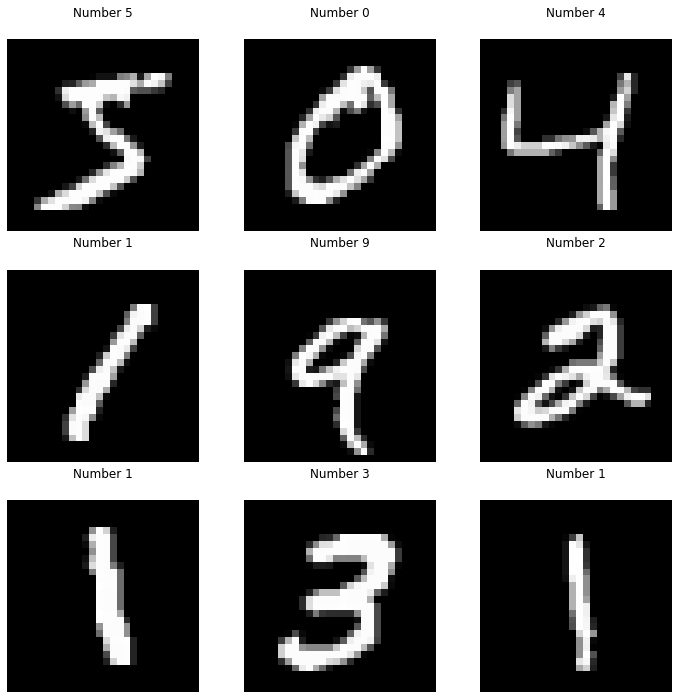

In [6]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

In [7]:
# Preprocessing the image

# Convert each images to one-dimensional
X = x_train.reshape(x_train.shape[0], -1)
Y = y_train

# Normalize the data, each data in range[0-1]
X = X.astype(float)/255.

print(f"X shape: {X.shape}") # each row represents different digits

X shape: (60000, 784)


## KMeans implementation

In [8]:
# Intialize number of cluster and centroids
k = 10

# Init centroid index
init_centroids_index = random.sample(range(0, len(X)), k)

# Use init_centroids as indices and get the points of these indices
init_centroids = [X[i] for i in init_centroids_index]
init_centroids = np.array(init_centroids)
init_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
def calc_distance(x1, x2):
    """
    Calculate Euclidean distances between two numpy as using vectorization.
    
    Arguments:
    x1: point 1, numpy array
    x2: point 2, numpy array
    
    Returns:
    Euclidean distance between x1 and x2.
    """
    return np.sum((x1-x2)**2, 1)**0.5

In [10]:
def find_closest_centroids(X, centroids):
    """
    Returns index of the closest centroids for given points
    
    Arguments:
    X: datasets, 1D or muti-dimensional numpy array
    centroids: cluster centroid, 1D or multi-dimensional numpy array
    
    Returns:
    closest_centroids: 1D array indicating closest centroid index for each data point
    """
    points_centroids_distances = [calc_distance(X, centroid) for centroid in centroids]
    points_centroids_distances = np.column_stack(points_centroids_distances)
    closest_centroids = np.argmin(points_centroids_distances, 1)
    return closest_centroids

In [11]:
def calc_centroids(X, clusters, number_of_cluster):
    """
    Calculates new centroids for different clusters by averaging datapoints assigned to different clusters.
    
    Arguments:
    X: datapoints
    clusters: Cluster label based on centroid index for each datapoints
    number_of_centroids: number of cluster i.e. k
    """
    new_centroids = [np.mean(X[clusters == cluster_index], 0) for cluster_index in range(number_of_cluster)]
    return new_centroids

In [12]:
centroids = init_centroids
for i in range(100):
    prev_centroids = centroids
    closest_centroids = find_closest_centroids(X, centroids)
    centroids = calc_centroids(X, closest_centroids, k)
    centroids = np.array(centroids)
    
    # Exit from loop if centroids are same for two iteration
    print(f"Iteration:{i}")
    if ((prev_centroids == centroids).all()):
        print(f"Centroids are same for two consecutive iteration so exiting.....")
        break

Iteration:0
Iteration:1
Iteration:2
Iteration:3
Iteration:4
Iteration:5
Iteration:6
Iteration:7
Iteration:8
Iteration:9
Iteration:10
Iteration:11
Iteration:12
Iteration:13
Iteration:14
Iteration:15
Iteration:16
Iteration:17
Iteration:18
Iteration:19
Iteration:20
Iteration:21
Iteration:22
Iteration:23
Iteration:24
Iteration:25
Iteration:26
Iteration:27
Iteration:28
Iteration:29
Iteration:30
Iteration:31
Iteration:32
Iteration:33
Iteration:34
Iteration:35
Iteration:36
Iteration:37
Iteration:38
Iteration:39
Iteration:40
Iteration:41
Iteration:42
Iteration:43
Iteration:44
Iteration:45
Iteration:46
Iteration:47
Iteration:48
Iteration:49
Iteration:50
Iteration:51
Iteration:52
Iteration:53
Iteration:54
Iteration:55
Iteration:56
Iteration:57
Iteration:58
Iteration:59
Iteration:60
Iteration:61
Iteration:62
Iteration:63
Iteration:64
Iteration:65
Iteration:66
Iteration:67
Iteration:68
Iteration:69
Iteration:70
Iteration:71
Iteration:72
Iteration:73
Iteration:74
Iteration:75
Iteration:76
Iteration